In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from warnings import filterwarnings
filterwarnings("ignore") # sklearn prints some unimportant warning messages

In [17]:
#import the dataset from your working directory and view it
iris = pd.read_csv('iris.csv')
iris.info()
iris.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
#since 'Id' column is insignificant, we can drop it and view the df again
iris = iris.drop("Id", axis=1) 
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


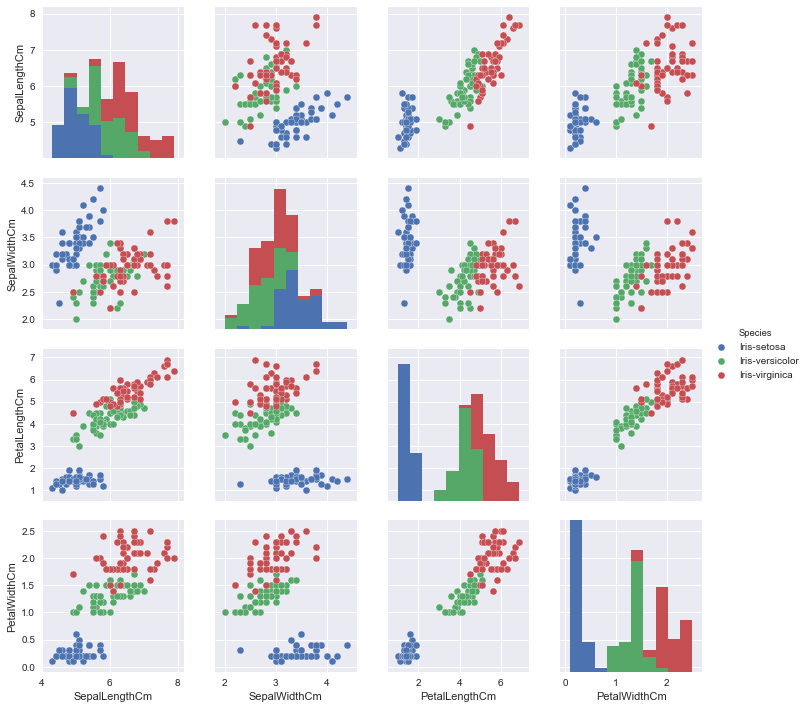

In [19]:
#let's do some visualization before we build our model
#the scatter plot and distribution
sns.pairplot(iris, hue="Species")

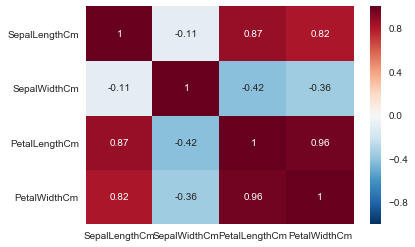

In [20]:
#the heatmap of correlations between features
sns.heatmap(iris.corr(), annot=True)

In [21]:
#store feature matrix in "X", in other words, the first 4 columns
X = iris.iloc[:,0:4]
#store label vector in "y"
y = iris['Species']

In [22]:
#STEP 1: split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

In [23]:
#print the shapes of the new X objects
print(X_train.shape)
print(X_test.shape)

#print the shapes of the new y objects
print(y_train.shape)
print(y_test.shape)

(90, 4)
(60, 4)
(90,)
(60,)


In [28]:
#Setting the number of neighbors = 5
#Train the model on the training set
#Test the model on the testing set
n_neighbors=5
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X, y)
y_pred = knn.predict(X)

In [31]:
#Evaluate how well we did
from sklearn import metrics
print("The accuracy of KNN (K={n_neighbors}): {0:.2}".format(knn.score(X_test, y_test),
                                                             n_neighbors=n_neighbors))

The accuracy of KNN (K=5): 0.97


In [32]:
# make a prediction for an out-of-sample observation
knn.predict([6, 5, 2, 2])

array(['Iris-setosa'], dtype=object)

In [33]:
# try K=1 through K=10 and record testing accuracy
k_range = list(range(1, 11))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

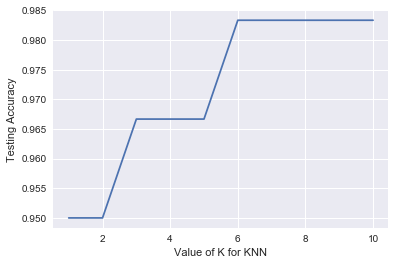

In [34]:
# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')